In [6]:
import numpy as np
import torch
import numpy as plt
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
df_cif10 = pd.read_csv('lid_logs/csv/10/10_cif10_k.csv')

In [9]:
df_cif10

,Unnamed: 0,path,layer,k,attack,architecture,dataset,run,score,score_adv
0,0,./data/extracted_characteristics/run_1/cif10/w...,0,10,gauss,wrn_28_10_10,cif10,1,25.80,25.81
1,1,./data/extracted_characteristics/run_1/cif10/w...,0,10,gauss,wrn_28_10_10,cif10,1,18.95,49.61
2,2,./data/extracted_characteristics/run_1/cif10/w...,0,10,gauss,wrn_28_10_10,cif10,1,19.07,21.38
3,3,./data/extracted_characteristics/run_1/cif10/w...,0,10,gauss,wrn_28_10_10,cif10,1,18.68,29.75
4,4,./data/extracted_characteristics/run_1/cif10/w...,0,10,gauss,wrn_28_10_10,cif10,1,30.61,38.57
...,...,...,...,...,...,...,...,...,...,...
775,775,./data/extracted_characteristics/run_1/cif10/w...,12,10,cw,wrn_28_10_10,cif10,1,7.52,19.96
776,776,./data/extracted_characteristics/run_1/cif10/w...,12,10,cw,wrn_28_10_10,cif10,1,2.00,15.29
777,777,./data/extracted_characteristics/run_1/cif10/w...,12,10,cw,wrn_28_10_10,cif10,1,15.66,28.88
778,778,./data/extracted_characteristics/run_1/cif10/w...,12,10,cw,wrn_28_10_10,cif10,1,1.46,10.96


In [10]:
df_gauss = df_cif10[df_cif10['attack'].str.contains('gauss')]

In [11]:
df_gauss_l0 = df_gauss[df_gauss['layer'].isin({0})]

In [12]:
df_gauss_l0.rename(columns = {'score':'layer_0', 'score_adv': 'layer_0_adv'}, inplace=True)

/home/lorenzp/.conda/envs/cuda--11-1-1--pytorch--1-9-0/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


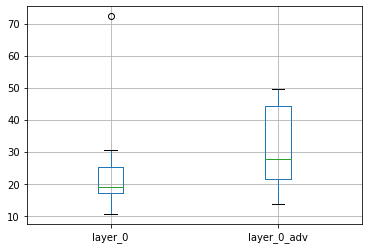

In [13]:
boxplot = df_gauss_l0.boxplot(column=['layer_0', 'layer_0_adv'])

In [14]:
 df_gauss[df_gauss['layer'].isin({1})]['score']

10    18.82
11    34.00
12    18.88
13    16.03
14    29.62
15    22.82
16    41.44
17    30.57
18    17.27
19    24.47
Name: score, dtype: float64

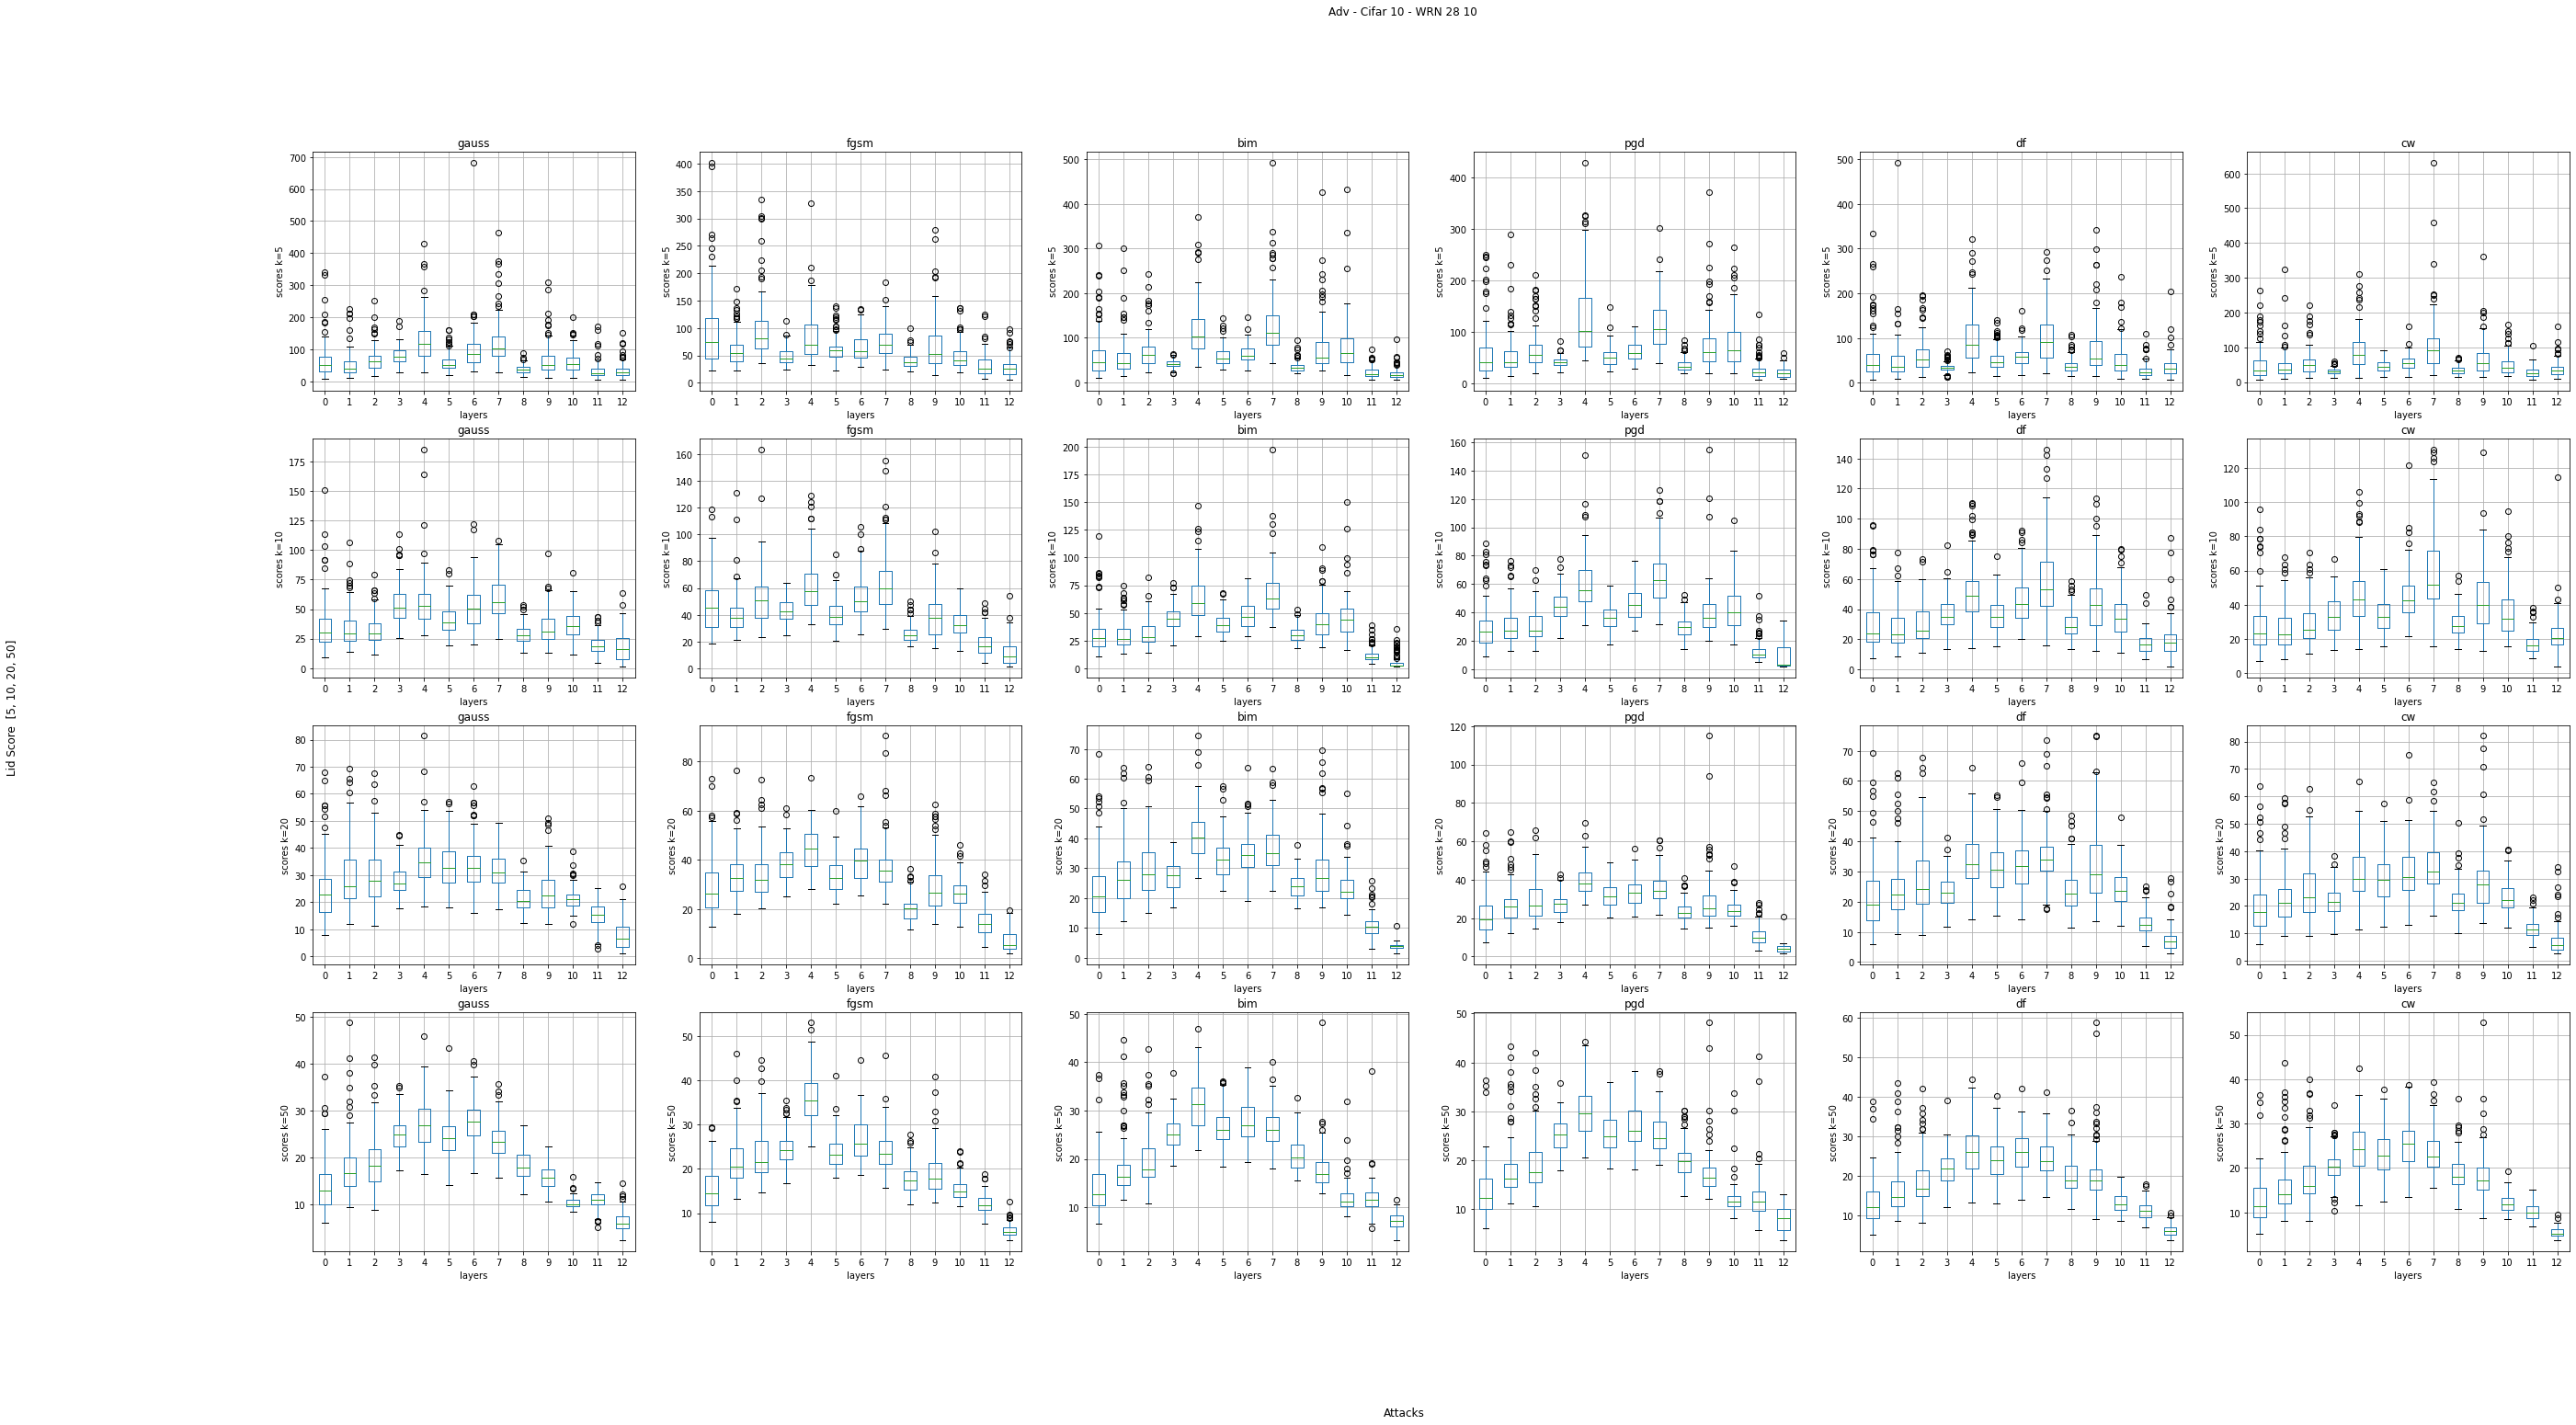

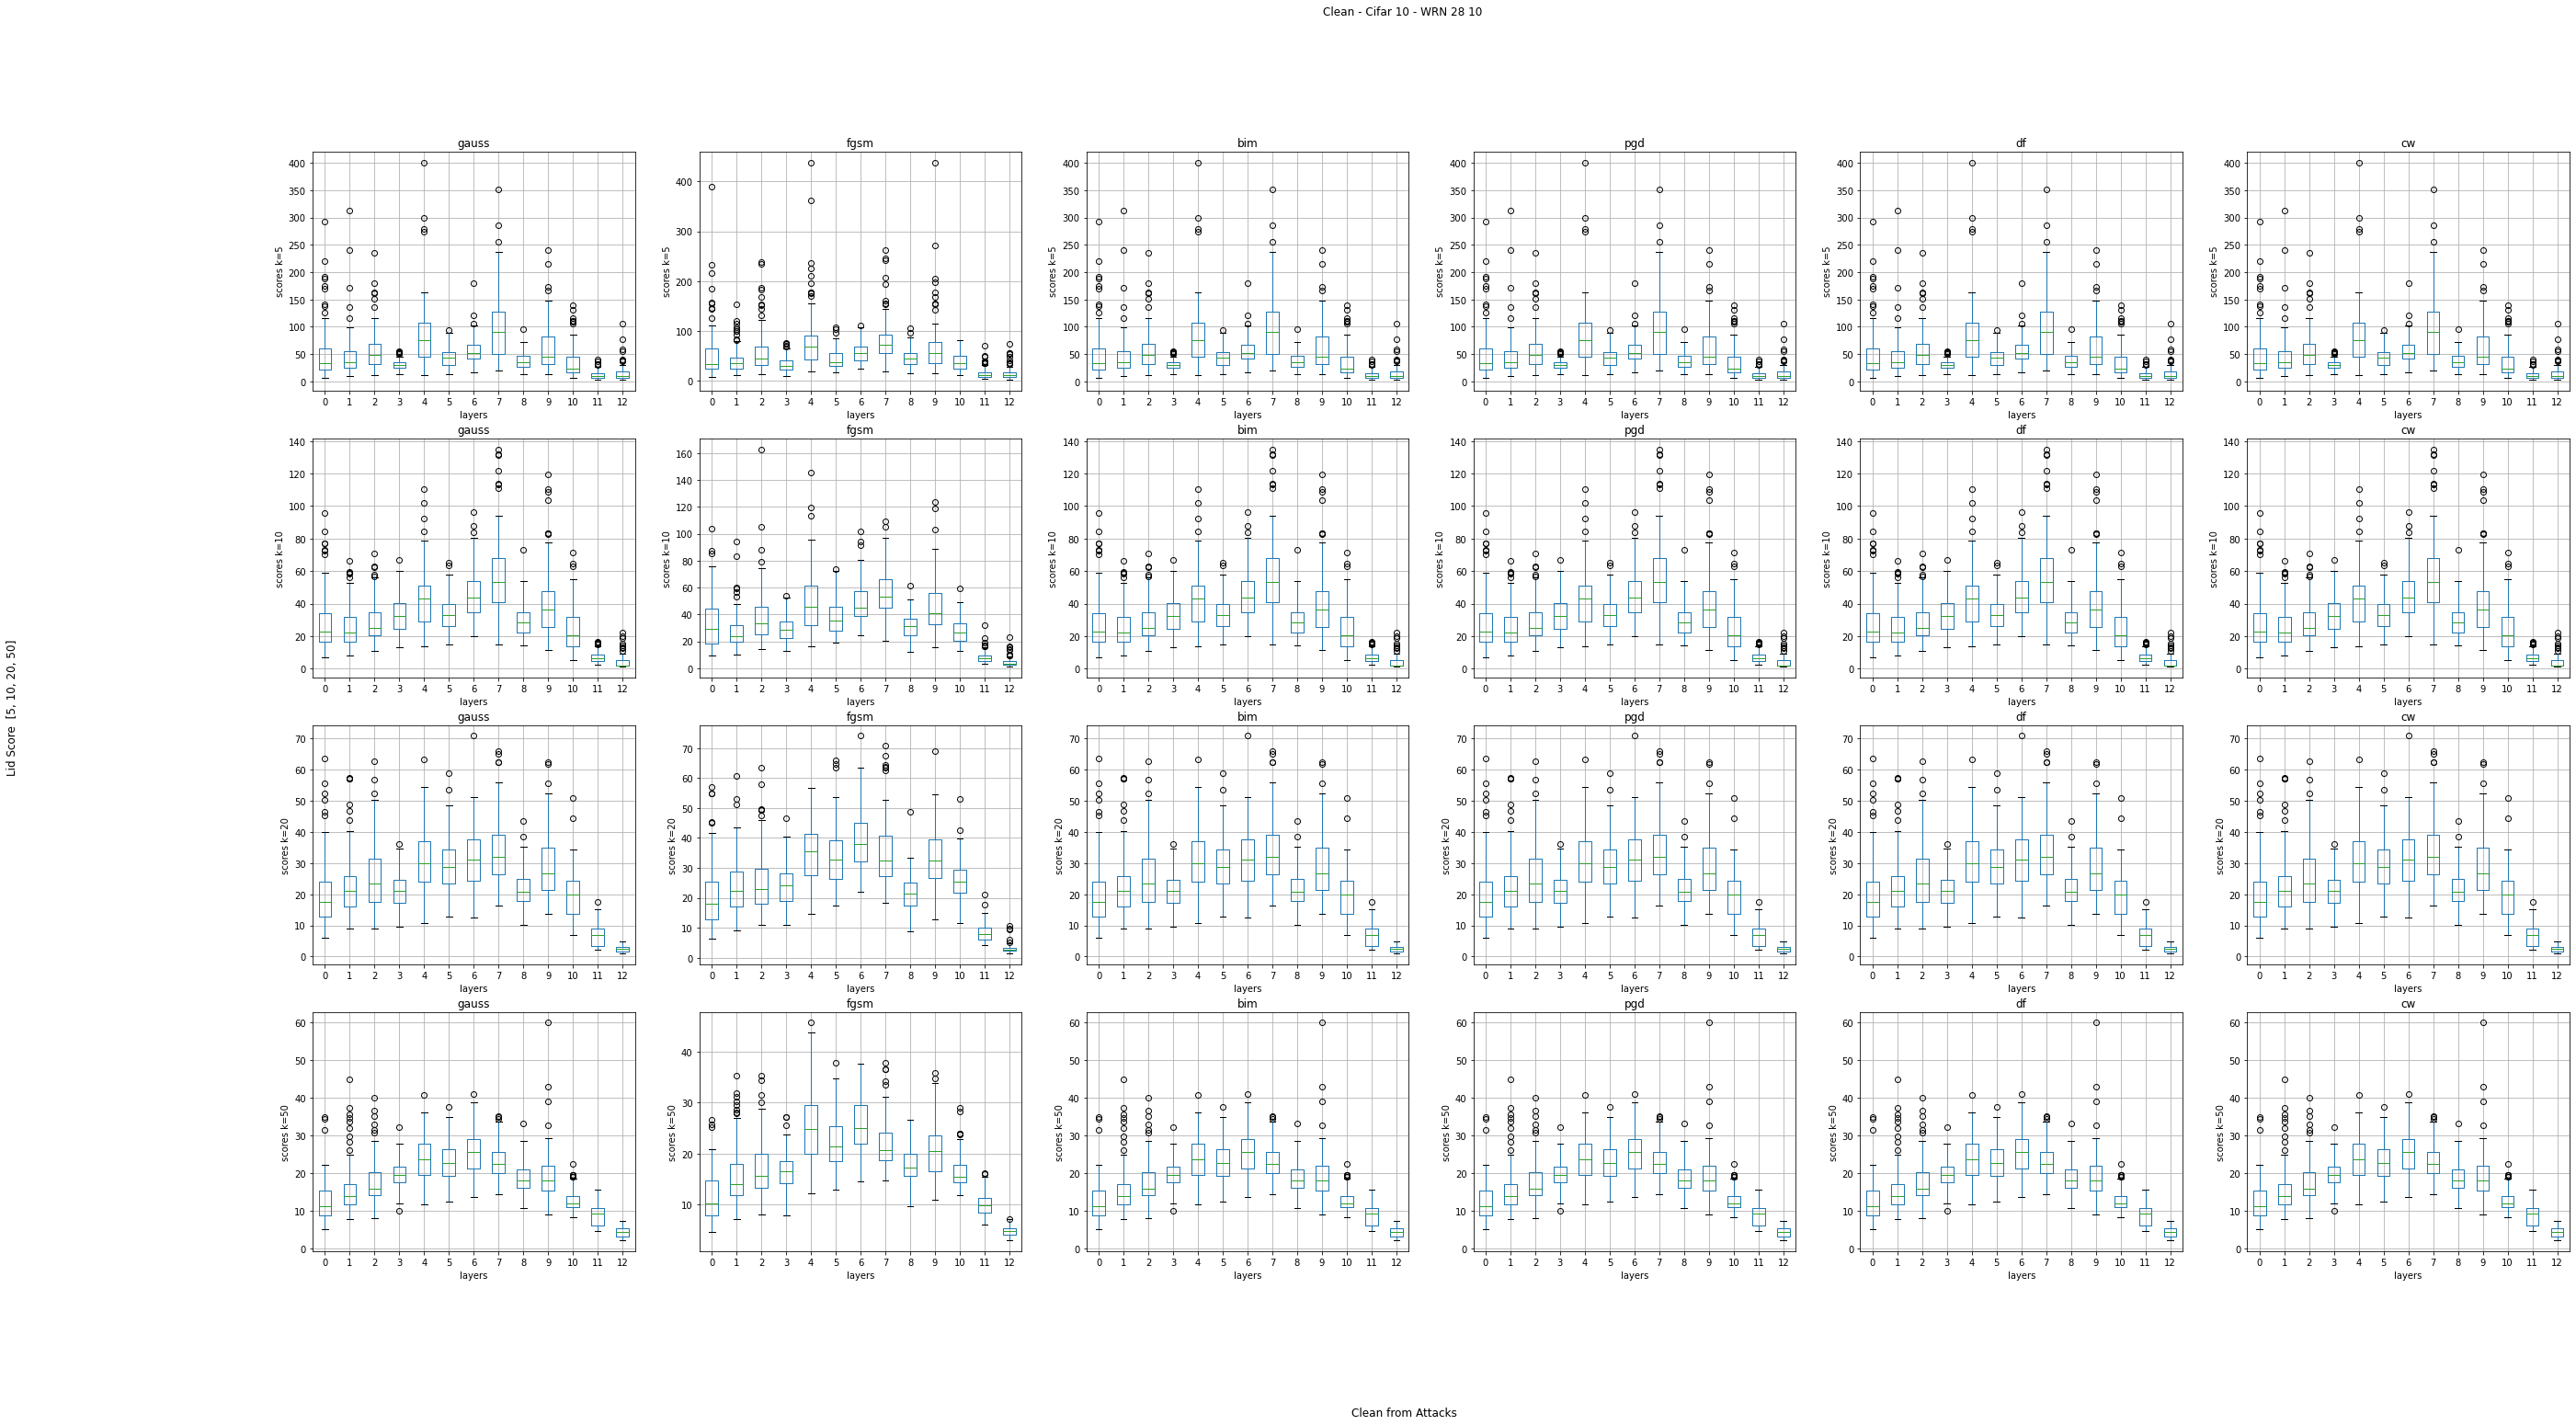

In [15]:
NR_SAMPLES=100

def gen_plot(axes,  att,  dictionary, k, type='clean'):
    # plt.figure()
    axes.set_title(att)
    dictionary[att].boxplot(ax=axes, column=columns_nor)
    axes.set_xlabel('layers')
    axes.set_ylabel('scores k={}'.format(k))
    

nr_layers = 13
# columns_nor = ['layer_' + str(x) for x in range(nr_layers)]
# columns_adv = ['layer_' + str(x) +'_adv' for x in range(nr_layers)]
columns_nor = [x for x in range(nr_layers)]
columns_adv = [x for x in range(nr_layers)]
lid_k = [5, 10, 20, 50]
attacks = ['gauss', 'fgsm', 'bim', 'pgd', 'df', 'cw']

fig2, axs2 = plt.subplots(len(lid_k), len(attacks), figsize=(44, 22))
fig, axs   = plt.subplots(len(lid_k), len(attacks), figsize=(44, 22))
fig.suptitle("Clean - Cifar 10 - WRN 28 10 ")
fig.supxlabel('Clean from Attacks')
fig.supylabel('Lid Score  [5, 10, 20, 50] ')

fig2.suptitle("Adv - Cifar 10 - WRN 28 10 ")
fig2.supxlabel('Attacks')
fig2.supylabel('Lid Score  [5, 10, 20, 50] ')

for row, k in enumerate(lid_k):
    df_cif10 = pd.read_csv('lid_logs/csv/{}/{}_cif10_k.csv'.format(NR_SAMPLES, k))

    dict_nor = {}
    dict_adv = {}

    for col, att in enumerate(attacks):
        df_attack = df_cif10[ df_cif10['attack'].str.contains(att) ]
        df_nor = pd.DataFrame( columns=columns_nor )
        df_adv = pd.DataFrame( columns=columns_adv )

        for it in range(nr_layers):
            # df_nor['layer_' + str(it)]          = df_attack[df_attack['layer'].isin({it})]['score'].values
            # df_adv['layer_' + str(it) + '_adv'] = df_attack[df_attack['layer'].isin({it})]['score_adv'].values
            df_nor[ it ] = df_attack[df_attack['layer'].isin({it})]['score'].values
            df_adv[ it ] = df_attack[df_attack['layer'].isin({it})]['score_adv'].values

        dict_nor[att] = df_nor
        dict_adv[att] = df_adv
        
        gen_plot( axs[row, col], att,  dict_nor, k, type='clean')
        gen_plot(axs2[row, col], att,  dict_adv, k, type='adv')
        
fig.savefig( 'plots/' + str(NR_SAMPLES) + '/' + 'cifar10.svg')
fig2.savefig('plots/' + str(NR_SAMPLES) + '/' + 'cifar10_adv.svg')

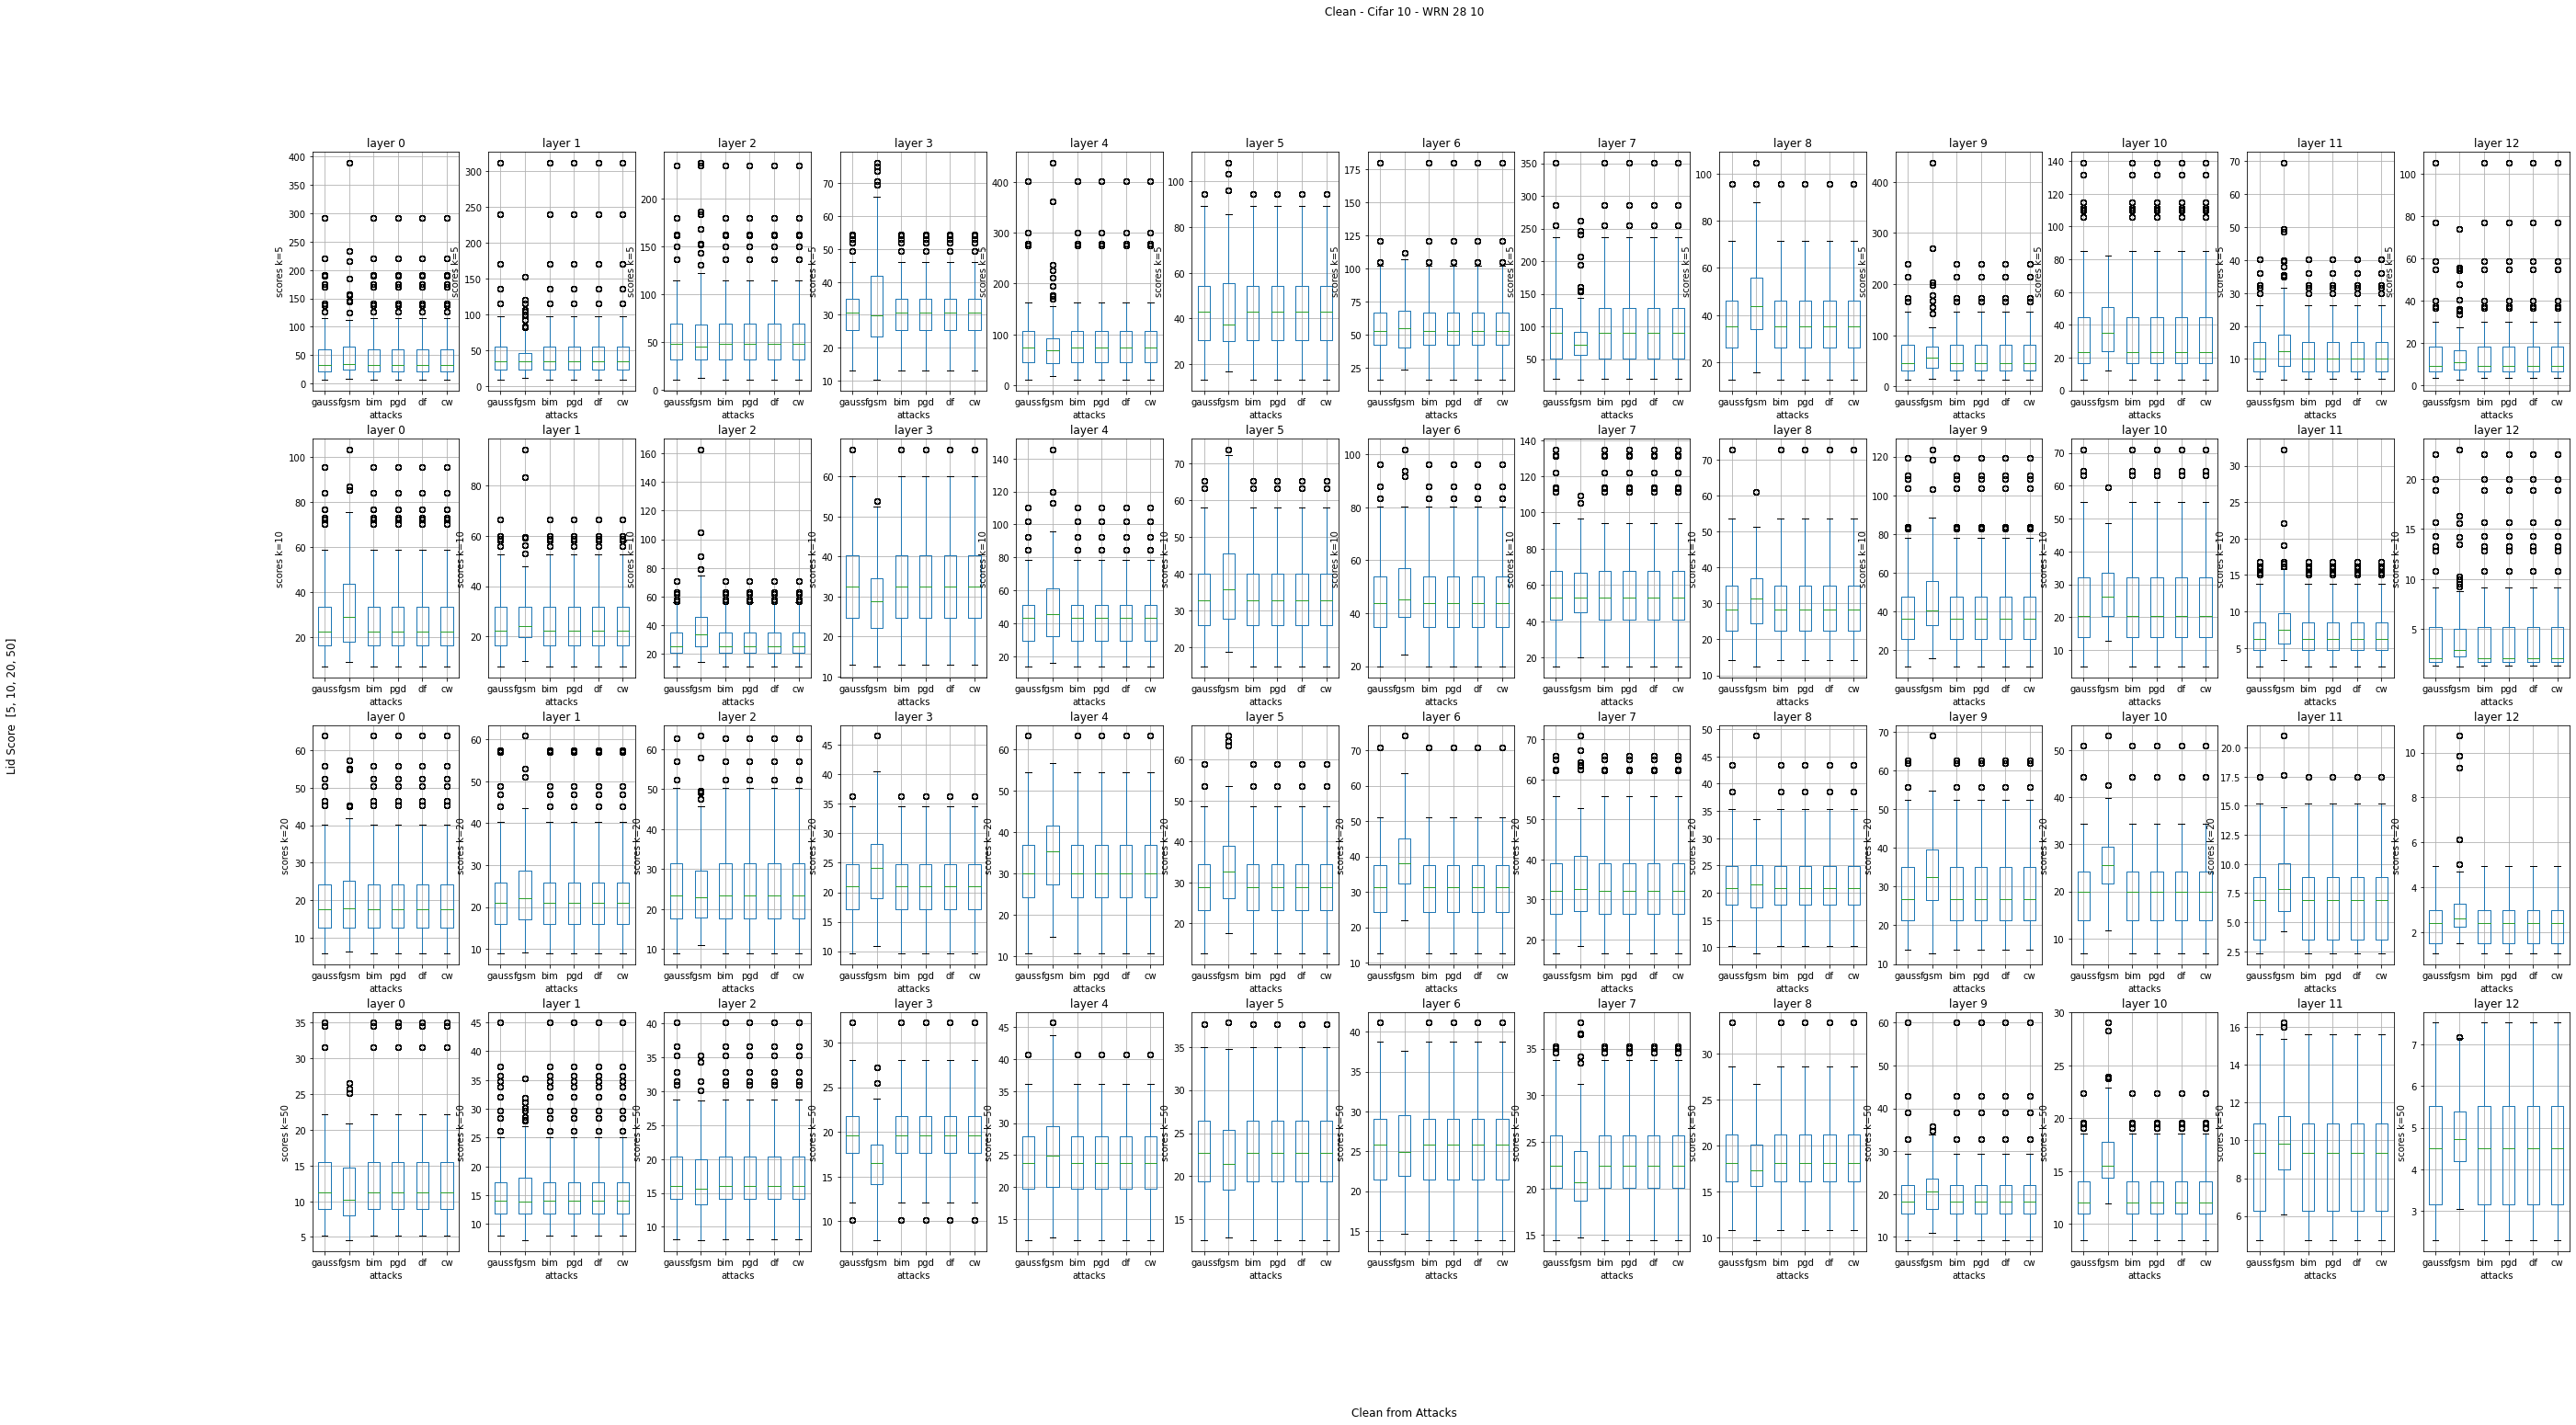

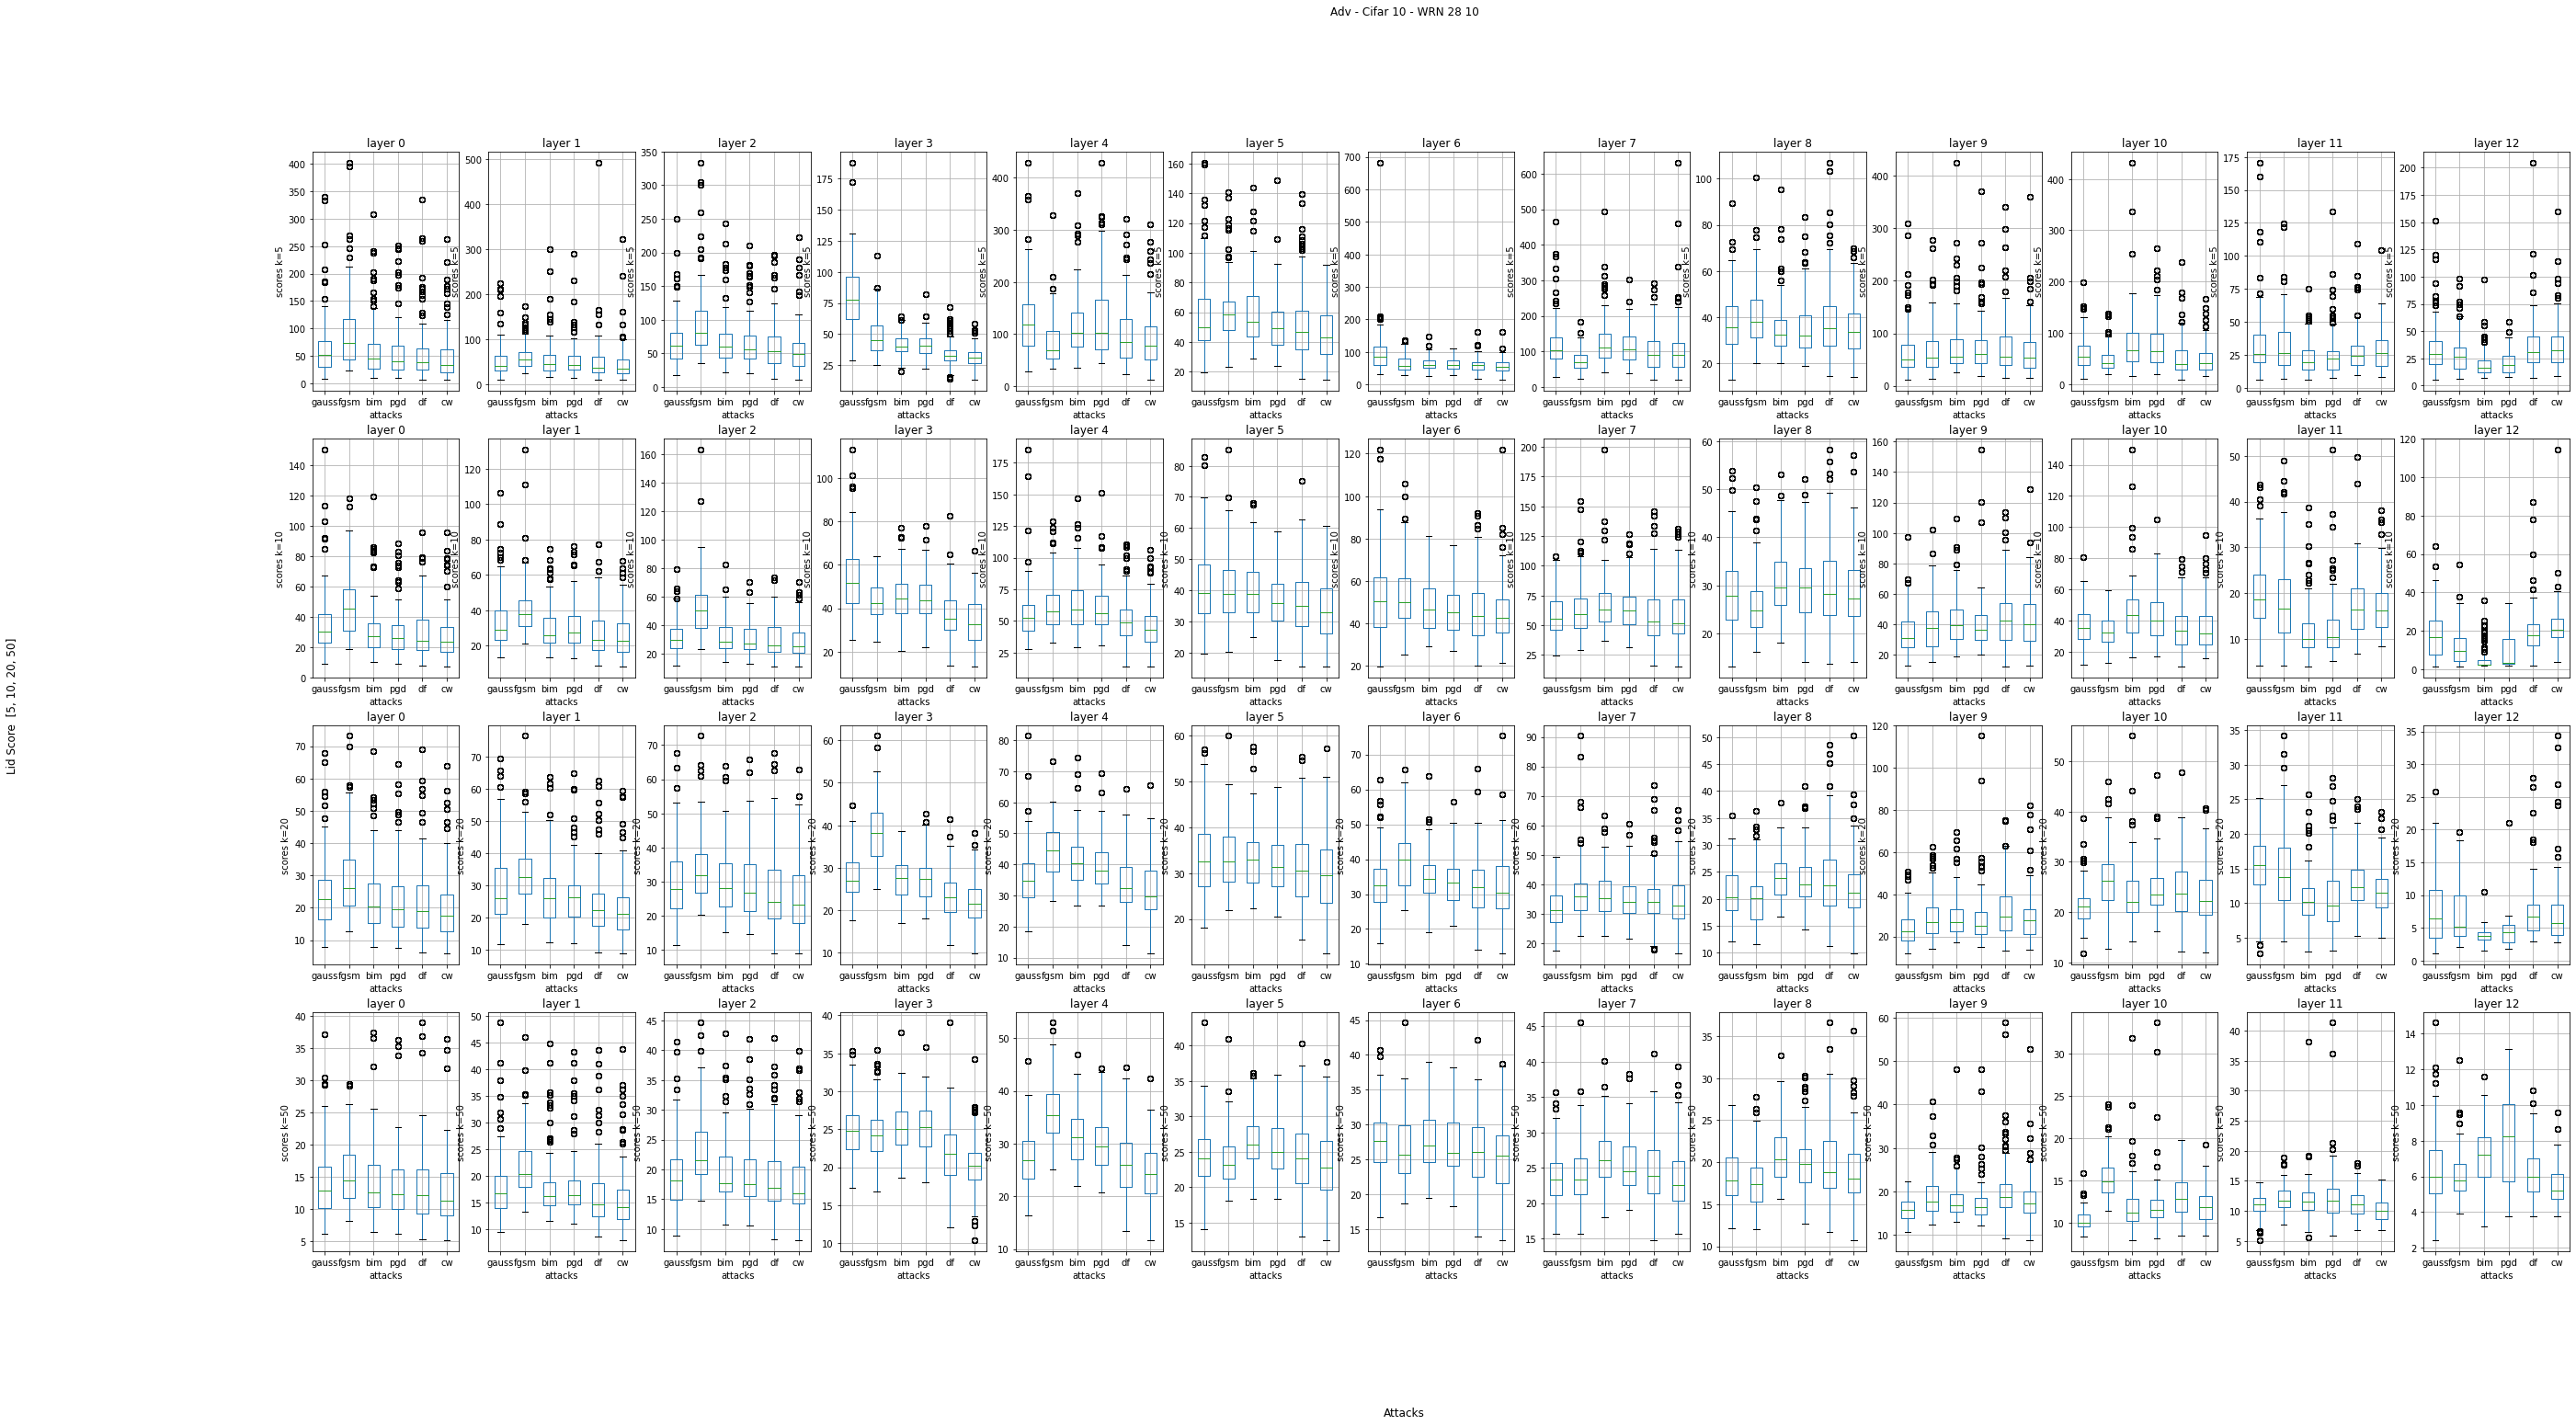

In [16]:
NR_SAMPLES=1000

def gen_plot(axes,  layer,  dictionary, attacks, k, type='clean'):
    axes.set_title("layer {}".format(layer))
    dictionary[layer].boxplot(ax=axes, column=attacks)
    axes.set_xlabel('attacks')
    axes.set_ylabel('scores k={}'.format(k))    

nr_layers = 13
# columns_nor = ['layer_' + str(x) for x in range(nr_layers)]
# columns_adv = ['layer_' + str(x) +'_adv' for x in range(nr_layers)]
columns_nor = [x for x in range(nr_layers)]
columns_adv = [x for x in range(nr_layers)]
lid_k = [5, 10, 20, 50]
attacks = ['gauss', 'fgsm', 'bim', 'pgd', 'df', 'cw']


fig, axs   = plt.subplots(len(lid_k), nr_layers, figsize=(44, 22))
fig2, axs2 = plt.subplots(len(lid_k), nr_layers, figsize=(44, 22))
fig.suptitle("Clean - Cifar 10 - WRN 28 10")
fig.supxlabel('Clean from Attacks')
fig.supylabel('Lid Score  [5, 10, 20, 50]')

fig2.suptitle("Adv - Cifar 10 - WRN 28 10")
fig2.supxlabel('Attacks')
fig2.supylabel('Lid Score  [5, 10, 20, 50]')

df_attack = df_cif10[df_cif10['attack'].str.contains('gauss')]
df_nor = pd.DataFrame( columns=attacks )
df_adv = pd.DataFrame( columns=attacks )

dict_nor = {}
dict_adv = {}

for row, k in enumerate(lid_k):
    df_cif10 = pd.read_csv('lid_logs/csv/{}/{}_cif10_k.csv'.format(NR_SAMPLES, k))
    
    for layer in range(nr_layers):
        df_nor = pd.DataFrame( columns=attacks )
        df_adv = pd.DataFrame( columns=attacks )

        for col, att in enumerate(attacks):
            # print("att", att)
            df_attack = df_cif10[df_cif10['attack'].str.contains(att)]

            df_nor[att] = df_attack[df_attack['layer'].isin({layer})]['score'].values
            df_adv[att] = df_attack[df_attack['layer'].isin({layer})]['score_adv'].values

        dict_nor[layer] = df_nor.copy()
        dict_adv[layer] = df_adv.copy()

        gen_plot(axs[row, layer],  layer,  dict_nor, attacks, k, type='clean')
        gen_plot(axs2[row, layer], layer,  dict_adv, attacks, k, type='adv')

In [17]:
fig.savefig( 'plots/' + str(NR_SAMPLES) + os.sep + 'cifar10_per_layer_attack.svg')
fig2.savefig('plots/' + str(NR_SAMPLES) + os.sep + 'cifar10_adv_per_layer_attack.svg')

<AxesSubplot:>

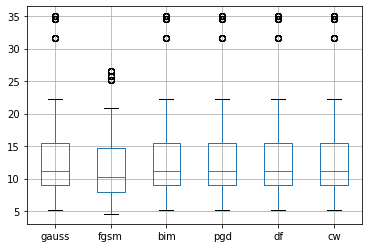

In [18]:
dict_nor[0].boxplot(column=attacks)

In [19]:
df_attack = df_cif10[df_cif10['attack'].str.contains('gauss')]
df_attack

df_attack[df_attack['layer'].isin({0})]['score'].values

array([13.83, 11.8 ,  8.19,  9.48, 14.21,  9.88, 21.57,  7.78,  8.13,
       13.44,  7.39, 22.21,  8.87, 21.04, 16.37, 12.89, 16.05, 11.24,
       10.79, 13.58, 15.38, 15.2 ,  6.26, 34.98,  9.42, 11.54,  9.88,
        8.96, 17.18, 12.5 , 10.52,  5.87,  8.94, 11.88, 10.02, 15.69,
        9.01, 21.3 , 21.51,  8.7 , 13.97, 16.3 , 16.29,  9.99, 14.21,
       16.02,  8.9 , 13.97,  7.36,  7.27, 13.57, 10.37, 11.29,  5.22,
       21.53, 14.98, 11.24, 14.69, 13.83, 10.84, 15.43, 10.67, 34.51,
       16.5 , 11.89,  6.79,  9.34,  8.84,  7.82, 13.56,  9.53, 15.09,
        8.9 , 11.2 , 11.01,  7.32, 31.61, 10.02, 10.75,  8.12,  9.16,
       16.02,  7.75, 10.18, 13.03, 10.5 ,  8.27, 15.45, 10.56,  7.22,
       18.81, 18.75,  5.17, 21.37, 10.02,  7.41,  8.39, 16.19, 19.52,
       17.93, 13.83, 11.8 ,  8.19,  9.48, 14.21,  9.88, 21.57,  7.78,
        8.13, 13.44,  7.39, 22.21,  8.87, 21.04, 16.37, 12.89, 16.05,
       11.24, 10.79, 13.58, 15.38, 15.2 ,  6.26, 34.98,  9.42, 11.54,
        9.88,  8.96,